### 07 로지스틱 회귀

- 로지스틱 회귀   
    : 선형 회귀 방식을 분류에 적용한 알고리즘  
    : 회귀가 선형인가 비선형인가는 가중치 변수가 선형인지 아닌지를 따름 (독립변수 X)  
    : 시그모이드 함수 최적선을 찾고 반환값을 확률로 간주해 확률에 따라 분류 결정  
    : 선형 회귀 방식을 기반으로 하되 시그모이드 함수를 이용해 분류를 수행하는 회귀

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [2]:
# 로지스틱 회귀는 데이터의 정규 분포도에 따라 예측 성능 영향 => 데이터에 표준스케일링 적용
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# N(0,1) 정규 분포 스케일링 (좌우 대칭을 위해 로그 변환도 가능함)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [5]:
# 로지스틱 회구로 학습 및 예측 수행, ROC-AUC값 구하기 (ROC-AUC : 다양한 임계값에서 모델의 분류 성능에 대한 측정 그래프)
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용해 학습 및 예측 수행
# solver 인자 값을 생성자로 입력하지 않으면 default : solver='lbfgs'
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)
lr_preds_proba = lr_clf.predict_proba(X_test)[:,1]

# accuracy와 roc_auc 측정
print(f'accuracy : {accuracy_score(y_test, lr_preds):.3f}, roc_auc : {roc_auc_score(y_test, lr_preds_proba):.3f}')

accuracy : 0.977, roc_auc : 0.995


In [8]:
# 서로 다른 solver 값으로 로지스틱회귀를 학습하고 성능평가
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

# 여러개의 solver 값별로 로지스틱 회귀 학습 후 ㅅ어능 평가
for solver in solvers:
    lr_clf = LogisticRegression(solver=solver, max_iter=600)
    lr_clf.fit(X_train, y_train)
    lr_preds = lr_clf.predict(X_test)
    lr_preds_proba = lr_clf.predict_proba(X_test)[:,1]

    # accuracy와 roc_auc 측정
    print(f'solver : {solver}      accuracy : {accuracy_score(y_test, lr_preds):.3f}, roc_auc : {roc_auc_score(y_test, lr_preds_proba):.3f}')

solver : lbfgs      accuracy : 0.977, roc_auc : 0.995
solver : liblinear      accuracy : 0.982, roc_auc : 0.995
solver : newton-cg      accuracy : 0.977, roc_auc : 0.995
solver : sag      accuracy : 0.982, roc_auc : 0.995
solver : saga      accuracy : 0.982, roc_auc : 0.995


In [9]:
# 로지스틱 회귀 주요 하이퍼 파라미터
# penalty : 규제(Regularization)의 유형 / Solver가 Liblinear, saga 인 경우에만 L1, L2 규제 모두 가능 / lbfgs, newton-cg, sag 인 경우에는 L2 규제만 가능함
# C       : 규제 강도를 조절하는 alpha값의 역수, 즉 C = 1/alpha

In [11]:
from sklearn.model_selection import GridSearchCV

params = {'solver':['liblinear', 'lbfgs'], 'penalty' : ['l2', 'l1'], 'C' : [0.01, 0.1,1,5,10]}

lr_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print(f'최적 하이퍼 파라미터 : {grid_clf.best_params_}, 최적 평균 정확도 : {grid_clf.best_score_:.3f}')

# solver가 lbfgs 일때 L1규제를 지원하지 않는데 GridSearchCV에서 L1규제값을 입력해 에러 메세지 발생

최적 하이퍼 파라미터 : {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도 : 0.979


c:\Users\kdp\anaconda3\envs\ML_38\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\kdp\anaconda3\envs\ML_38\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\kdp\anaconda3\envs\ML_38\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\kdp\anaconda3\envs\ML_38\lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _check_solver(s

- 로지스틱 회귀는 가볍고 빠르지만 이진 분류 예측 성능도 뛰어남  => 이진 분류의 기본 모델로 로지스틱 회귀 사용하는 경우 많음
- 로지스틱 회귀는 희소한 데이터 세트 분류에도 뛰어난 성능을 보임 => 텍스트 분류에서도 자주 사용

### 09 회귀 실습 - 자전거 대여 수요 예측

In [12]:
# 데이터 클렌징 및 가공과 데이터 시각화
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

bike_df = pd.read_csv('./bike_train.csv')
print(bike_df.shape)
bike_df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [13]:
bike_df.info()
# datetime열은 타입이 object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [14]:
# 문자열을 datetime 타입으로 변경
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# datetime 타입에서 년,월,일,시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [15]:
# datetime 칼럼 삭제
# casual, registered 칼럼 삭제 (count 칼럼 값 : casual + registered)

drop_columns = ['datetime', 'casual', 'registered']
bike_df.drop(drop_columns, axis=1, inplace=True)

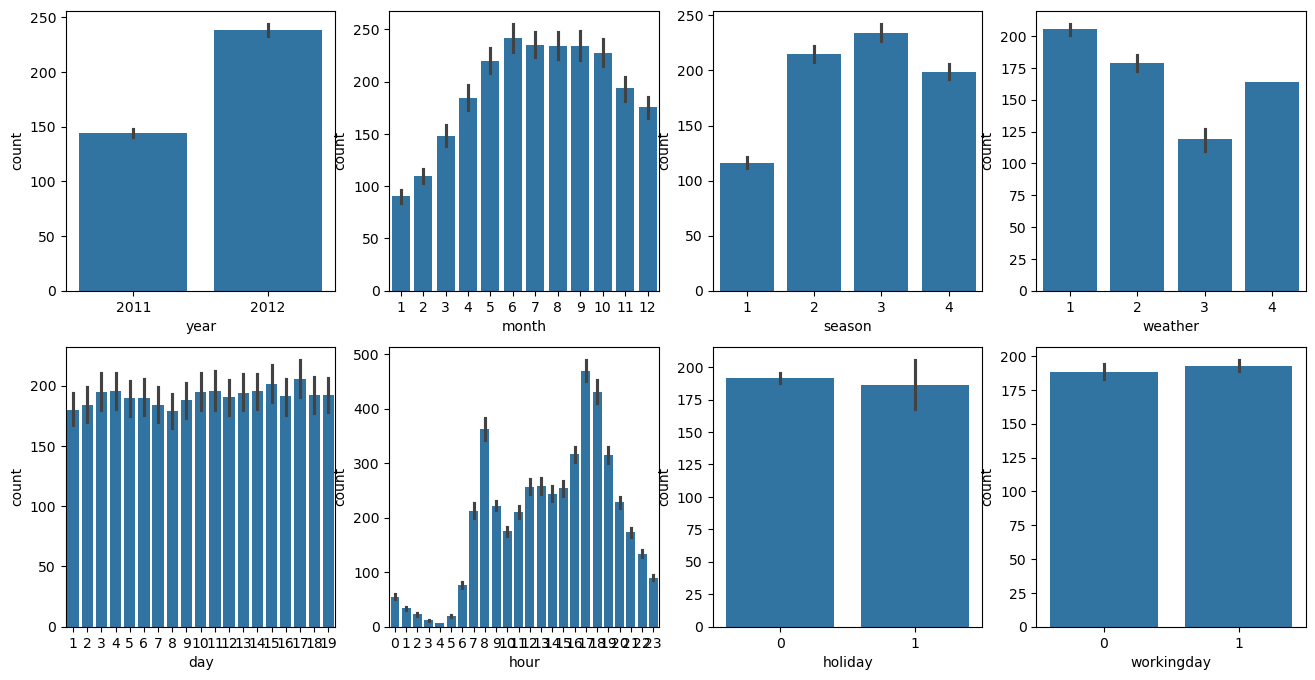

In [17]:
# 컬럼별로 count가 어떻게 분포 되어 있는지 시각화 (2행 4열)
fig, axs = plt.subplots(figsize = (16,8), ncols=4, nrows=2)
cat_features = ['year', 'month', 'season', 'weather', 'day', 'hour', 'holiday', 'workingday']
# cat_features에 있는 모든 칼럼별로 개별 칼럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4
    # seaborn의 barplot을 이용해 칼럼값에 따른 count의 합을 표현
    sns.barplot(x=feature, y='count', data = bike_df, ax = axs[row][col])

In [20]:
# 예측 성능 측정 : RMSLE, MAE, RMSE 함수 정의
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN 등의 이슈로 log()가 아닌 log1p()를 이용해 RMSLE 계산
# log1p(x)의 경우 log(1+x)로 변환되므로 x값이 0이 되더라도 log(0)인 무한대가 되지 않고 log(1)인 0이 되므로 오버플로/언더플로 문제 해결
# 원래 스케일 복원은 넘파이의 expm1()함수로 가능
def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y-log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error()를 이용해 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MAE, RMSE, RMSLE를 모두 계산
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE는 사이킷런의 mean_absolute_error()로 계싼
    mae_val = mean_absolute_error(y,pred)
    print(f'RMSLE : {rmsle_val:.3f}, RMSE : {rmse_val:.3f}, MAE : {mae_val:.3f}')

In [21]:
# 로그변환, 피처 인코딩과 모델학습/예측/평가
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

RMSLE : 1.165, RMSE : 140.900, MAE : 105.924


In [23]:
# 실제값과 예측값이 어느정도 차이가 나는지 확인
def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame의 칼럼으로 실제 대여 횟수(count)와 예측값을 서로 비교할 수 있도록 생성
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count']-result_df['predicted_count'])

    # 예측값과 실제 값이 가장 큰 데이터 순으로 출력
    print(result_df.sort_values('diff', ascending=False)[:n_tops])

get_top_error_data(y_test, pred, n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


<Axes: >

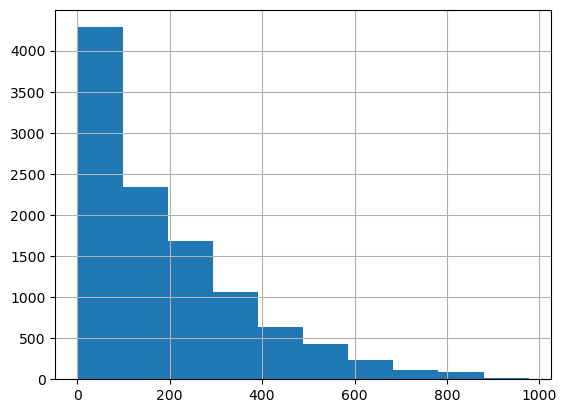

In [24]:
# 회귀에서 큰 예측 오류가 발생할 경우 Target 값의 분포가 왜곡된 형태를 이루고 있는지 확인 / Target 값의 분포는 정규 분포 형태가 가장 좋음 => 히스토그램으로 확인
y_target.hist()
# count 칼럼 값이 정규 분포가 아닌 0~200 사이에 왜곡되어 있음

<Axes: >

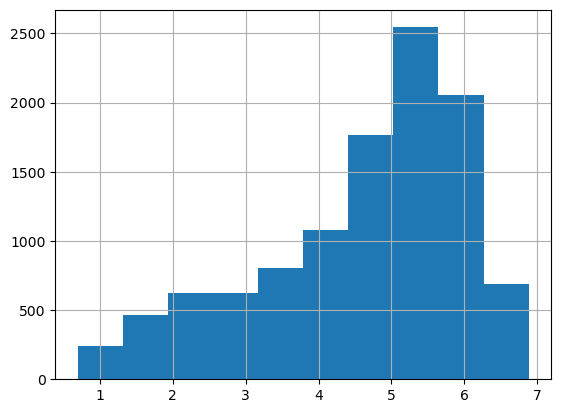

In [25]:
# 넘파이의 log1p()를 이용해 정규분포 형태로 바꾸기
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [26]:
# 위처럼 변환된 분포를 이용해 다시 학습한 후 평가 수행
# 타깃 칼럼인 count 값을 log1p로 로그 변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영해 학습/테스트 데이터 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 세트의 Target 값은 로그 변환 됐으므로 다시 expm1()을 이용해 원래 스케일로 변환
y_test_exp = np.expm1(y_test)

# 예측값 역시 로그 변환된 타깃 기반으로 학습되어 예측 됐으므로 다시 expm1()을 이용해 변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)

RMSLE : 1.017, RMSE : 162.594, MAE : 109.286


<Axes: ylabel='None'>

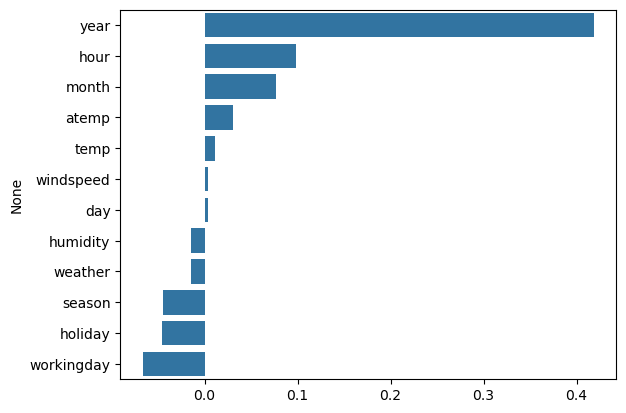

In [27]:
# 개별 피처들의 인코딩을 적용 / 각 피처의 회귀 계숫값을 시각화
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x = coef_sort.values, y=coef_sort.index)

In [28]:
# 카테고리형 피처 => 수치형으로 변환 (원핫인코딩 적용 - 판다스의 get_dummies() 이용)
# 'year','month', 'day', 'hour' 등의 피처들을 One Hot Encoding
X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'season', 'weather'])

In [29]:
# 원-핫 인코딩이 적용된 피처 데이터 세트 기반으로 학습/예측 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log, test_size=0.3, random_state=0)

# 모델과 학습/테스트 데이터 세트를 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)

    print('###',model.__class__.__name__, '###')
    evaluate_regr(y_test, pred)

# 모델별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
RMSLE : 0.590, RMSE : 97.690, MAE : 63.383
### Ridge ###
RMSLE : 0.590, RMSE : 98.529, MAE : 63.893
### Lasso ###
RMSLE : 0.635, RMSE : 113.219, MAE : 72.803


<Axes: ylabel='None'>

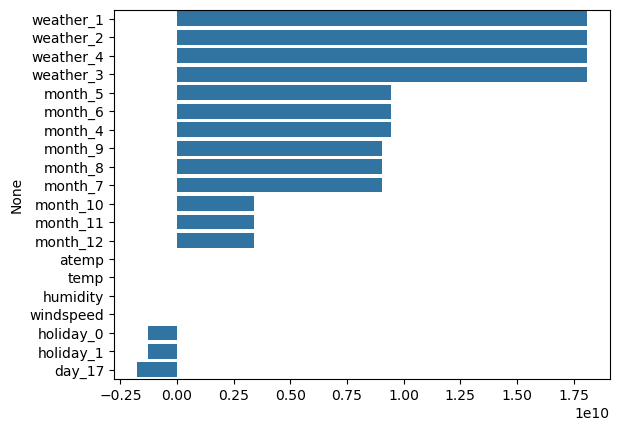

In [30]:
# 원핫인코딩된 데이터 세트에서 회귀계수가 높은 피처를 다시 시각화 (상위 20개)
coef = pd.Series(lr_reg.coef_, index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [ ]:
# 원-핫 인코딩 이후 weather, month가 상위를 차지 => 피처들의 영향도가 달라지고 모델 성능도 향상
# ==> 선형 회귀의 경우 중요 카테고리성 피처들을 원-핫 인코딩으로 변환하면 성능에 중요한 영향을 미칠 수 있음